In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(242150, 10)
(26900, 9)


In [4]:
df_train = train
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


In [5]:
df_test = test
df_test.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3 years,13.105362,C1,10 years,credit_card,682.016083,Individual
1,242151,2257.465815,5 years,14.196200,C5,10 years,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3 years,8.307772,A5,10 years,credit_card,703.277694,Individual
3,242153,520.284912,3 years,6.956504,A2,7 years,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3 years,11.658497,B3,6 years,debt_consolidation,698.368991,Individual


In [6]:
def code_transform(x):
    
    if x == 'FullyPaid':
        y = 0
    else:
        y = 1
        
    return y

df_train['loan_status'] = df_train.loan_status.apply(lambda x: code_transform(x))
df_train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,1
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,0
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,0


In [7]:
df_train = train[[col for col in train.columns if col != 'loan_status']]
y = train.loan_status

df_train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual


In [8]:
print(df_train.shape)
print(df_test.shape)

(242150, 9)
(26900, 9)


In [9]:
# trainデータだけでモデルを作成するが、trainとtestで特徴量を統一しておく必要があるので、結合して前処理していく

df_all = pd.concat([df_train, df_test], axis=0)

print(df_all.shape)
df_all.head(10)

(269050, 9)


,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual
5,5,3502.170573,5 years,22.868578,D5,2 years,debt_consolidation,663.337598,Individual
6,6,637.726335,3 years,13.791424,B4,10 years,medical,718.177679,Individual
7,7,2147.822844,5 years,23.738449,A3,10 years,debt_consolidation,656.789397,Individual
8,8,548.580817,3 years,18.070056,D3,10 years,debt_consolidation,660.005551,Individual
9,9,701.824350,3 years,11.321683,B4,0 years,credit_card,656.609116,Individual


In [10]:
# idカラムを外す
df_all = df_all[[col for col in df_all.columns if col != 'id']]
df_all.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual
1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual
2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual
3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual
4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual


In [11]:
df_all.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269050 entries, 0 to 26899
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amnt          269050 non-null  float64
 1   term               269050 non-null  object 
 2   interest_rate      269050 non-null  float64
 3   grade              269050 non-null  object 
 4   employment_length  269050 non-null  object 
 5   purpose            269050 non-null  object 
 6   credit_score       269050 non-null  float64
 7   application_type   269050 non-null  object 
dtypes: float64(3), object(5)
memory usage: 18.5+ MB


In [12]:
print(df_all.term.unique())
print(df_all.grade.unique())
print(df_all.application_type.unique())
print(df_all.purpose.unique())
print(df_all.employment_length.unique())

['3 years' '5 years']
['A5' 'B1' 'C2' 'C1' 'E5' 'D5' 'B4' 'A3' 'D3' 'C3' 'A2' 'D1' 'A1' 'C5'
 'A4' 'C4' 'E4' 'B2' 'B5' 'D2' 'D4' 'B3' 'E2' 'E1' 'E3' 'F3' 'F5']
['Individual' 'Joint App']
['debt_consolidation' 'credit_card' 'medical' 'other' 'home_improvement'
 'car' 'major_purchase' 'small_business' 'house' 'moving']
['0 years' '10 years' '1 year' '2 years' '3 years' '6 years' '9 years'
 '7 years' '4 years' '5 years' '8 years']


In [13]:
# term

def code_transform(x):
    if x == '3 years':
        y = 3
    else:
        y = 5   
    return y

df_all['term'] = df_all.term.apply(lambda x: code_transform(x))
df_all.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,609.296068,3,8.421982,A5,0 years,debt_consolidation,714.061803,Individual
1,1183.266999,5,10.286776,B1,10 years,credit_card,697.706701,Individual
2,695.783256,3,14.723425,C2,1 year,debt_consolidation,656.419357,Individual
3,738.392546,3,14.260708,C1,0 years,credit_card,657.906852,Individual
4,1642.400654,5,25.217452,E5,10 years,debt_consolidation,662.972297,Individual


In [14]:
# employment_length

def code_transform(x):
    if x == '0 years':
        y = 0
    elif x == '1 year':
        y = 1
    elif x == '2 years':
        y = 2
    elif x == '3 years':
        y = 3
    elif x == '4 years':
        y = 4
    elif x == '5 years':
        y = 5
    elif x == '6 years':
        y = 6
    elif x == '7 years':
        y =7
    elif x == '8 years':
        y = 8
    elif x == '9 years':
        y = 9
    else:
        y = 10
    return y

df_all['employment_length'] = df_all.employment_length.apply(lambda x: code_transform(x))
df_all.head(10)

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual
1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,Individual
2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual
3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual
4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,Individual
5,3502.170573,5,22.868578,D5,2,debt_consolidation,663.337598,Individual
6,637.726335,3,13.791424,B4,10,medical,718.177679,Individual
7,2147.822844,5,23.738449,A3,10,debt_consolidation,656.789397,Individual
8,548.580817,3,18.070056,D3,10,debt_consolidation,660.005551,Individual
9,701.824350,3,11.321683,B4,0,credit_card,656.609116,Individual


In [15]:
numerical_col = [col for col in df_all.columns if df_all[col].dtype != 'object']
categorical_col = [col for col in df_all.columns if df_all[col].dtype == 'object']

print(numerical_col)
print(categorical_col)

['loan_amnt', 'term', 'interest_rate', 'employment_length', 'credit_score']
['grade', 'purpose', 'application_type']


In [16]:
X_num = df_all[numerical_col]
X_num.fillna(X_num.median(), inplace=True)

X_cat = df_all[categorical_col]
X_cat.fillna(value='missing', inplace=True)

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [17]:
X_cat = pd.get_dummies(X_cat)

In [18]:
print(X_num.shape)
print(X_cat.shape)

(269050, 5)
(269050, 39)


In [19]:
X_total = pd.concat([X_num, X_cat], axis=1)

print(X_total.shape)
X_total.head()

(269050, 44)


,loan_amnt,term,interest_rate,employment_length,credit_score,grade_A1,grade_A2,grade_A3,grade_A4,grade_A5,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,application_type_Individual,application_type_Joint App
0,609.296068,3,8.421982,0,714.061803,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1183.266999,5,10.286776,10,697.706701,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,695.783256,3,14.723425,1,656.419357,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,738.392546,3,14.260708,0,657.906852,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1642.400654,5,25.217452,10,662.972297,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [22]:
train_rows = train.shape[0]
X = X_total[:train_rows]

# 標準化すると、array型のデータとなり、データフレーム形式が見れなくなる
std = StandardScaler()
X = std.fit_transform(X)

y = y[:train_rows]

print(train_rows)
print(X.shape)
print(y.shape)

242150
(242150, 44)
(242150,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(169505, 44)
(169505,)
(72645, 44)
(72645,)


In [32]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_proba = logreg.predict_proba(X_test)[: , 1]
print(y_proba[:5])

y_pred = logreg.predict(X_test)
print(y_pred[:5])

[0.46182081 0.30458915 0.45355168 0.34961957 0.82286201]
[0 0 0 0 1]


0.6260169316539335
0.3825735193854825


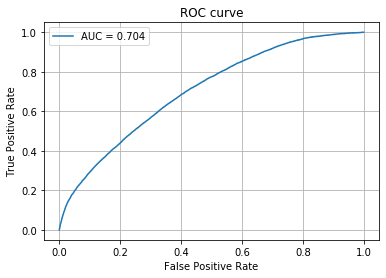

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

In [35]:
X_total.head()

,loan_amnt,term,interest_rate,employment_length,credit_score,grade_A1,grade_A2,grade_A3,grade_A4,grade_A5,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,application_type_Individual,application_type_Joint App
0,609.296068,3,8.421982,0,714.061803,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1183.266999,5,10.286776,10,697.706701,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,695.783256,3,14.723425,1,656.419357,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,738.392546,3,14.260708,0,657.906852,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1642.400654,5,25.217452,10,662.972297,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [36]:
test_set = X_total[train_rows:]
test_set = std.fit_transform(test_set)

print(test_set.shape)

(26900, 44)


In [37]:
# 今回はidも入れてモデリングしていたのと、テストデータに標準化をし忘れていたことが問題だった

test_proba = logreg.predict_proba(test_set)[:, 1]
print(test_proba[:10])

test_pred = logreg.predict(test_set)
print(test_pred[:10])

print(test_proba.shape)
print(test.shape)

[0.40504168 0.65514352 0.14031801 0.09804794 0.34165699 0.62757805
 0.34804972 0.15165692 0.32132259 0.32374817]
[0 1 0 0 0 1 0 0 0 0]
(26900,)
(26900, 9)


In [41]:
submit = pd.DataFrame(test_proba, index=test['id'], columns=['loan_status'])
submit.to_csv('submit_proba.csv', header=False)
submit.head(10)

,loan_status
id,
242150,0.405042
242151,0.655144
242152,0.140318
242153,0.098048
242154,0.341657
242155,0.627578
242156,0.348050
242157,0.151657
242158,0.321323


In [45]:
submit = pd.DataFrame(test_pred, index=test['id'], columns=['loan_status'])
submit.to_csv('submit_pred.csv', header=False)
submit.head(10)

,loan_status
id,
242150,0
242151,1
242152,0
242153,0
242154,0
242155,1
242156,0
242157,0
242158,0
